In [5]:
# Adarsh Anand
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import (GridSearchCV, StratifiedKFold,train_test_split)
from sklearn.metrics import (accuracy_score, classification_report,
confusion_matrix, mean_absolute_error,roc_auc_score)
from sklearn.ensemble import (AdaBoostClassifier, RandomForestClassifier,RandomForestRegressor)
import re,random,sys,json,time,os,warnings,pickle,datetime,subprocess,requests,math
import pyforest,klib,missingno as msno
import numpy as np, pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
from typing import List, Dict, Tuple, Any
#import keras as kr,tensorflow as tf,cv2 as cv

warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'retina'
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
sns.set(style='whitegrid', color_codes=True, font_scale=1.5,
        palette='plasma', font='Arial', rc={'figure.figsize': (10, 8)})

In [6]:
df=pd.read_csv('./Leetcode Problem Tracker - Leetcode Question Bank.csv')
df

,ID,Title,Link,titleSlug,Approach,Difficulty,Topics
0,1,Two Sum,Two Sum,two-sum,Basic 2 Pointer,Easy,"Array, Hash Table,"
1,2,Add Two Numbers,Add Two Numbers,add-two-numbers,NaN,Medium,"Linked List, Math,"
2,3,Longest Substring Without Repeating Characters,Longest Substring Without Repeating Characters,longest-substring-without-repeating-characters,NaN,Easy,"Hash Table, Two Pointers, String, Sliding Wind..."
3,4,Median of Two Sorted Arrays,Median of Two Sorted Arrays,median-of-two-sorted-arrays,NaN,Hard,"Array, Binary Search, Divide and Conquer,"
4,5,Longest Palindromic Substring,Longest Palindromic Substring,longest-palindromic-substring,NaN,Easy,"String, Dynamic Programming,"
...,...,...,...,...,...,...,...
1501,1502,Can Make Arithmetic Progression From Sequence,Can Make Arithmetic Progression From Sequence,can-make-arithmetic-progression-from-sequence,NaN,Hard,"Array, Sort,"
1502,1503,Last Moment Before All Ants Fall Out of a Plank,Last Moment Before All Ants Fall Out of a Plank,last-moment-before-all-ants-fall-out-of-a-plank,NaN,Medium,"Array, Brainteaser,"
1503,1504,Count Submatrices With All Ones,Count Submatrices With All Ones,count-submatrices-with-all-ones,NaN,Easy,"Dynamic Programming,"
1504,1505,Minimum Possible Integer After at Most K Adjac...,Minimum Possible Integer After at Most K Adjac...,minimum-possible-integer-after-at-most-k-adjac...,NaN,Hard,"Greedy,"


<AxesSubplot:>

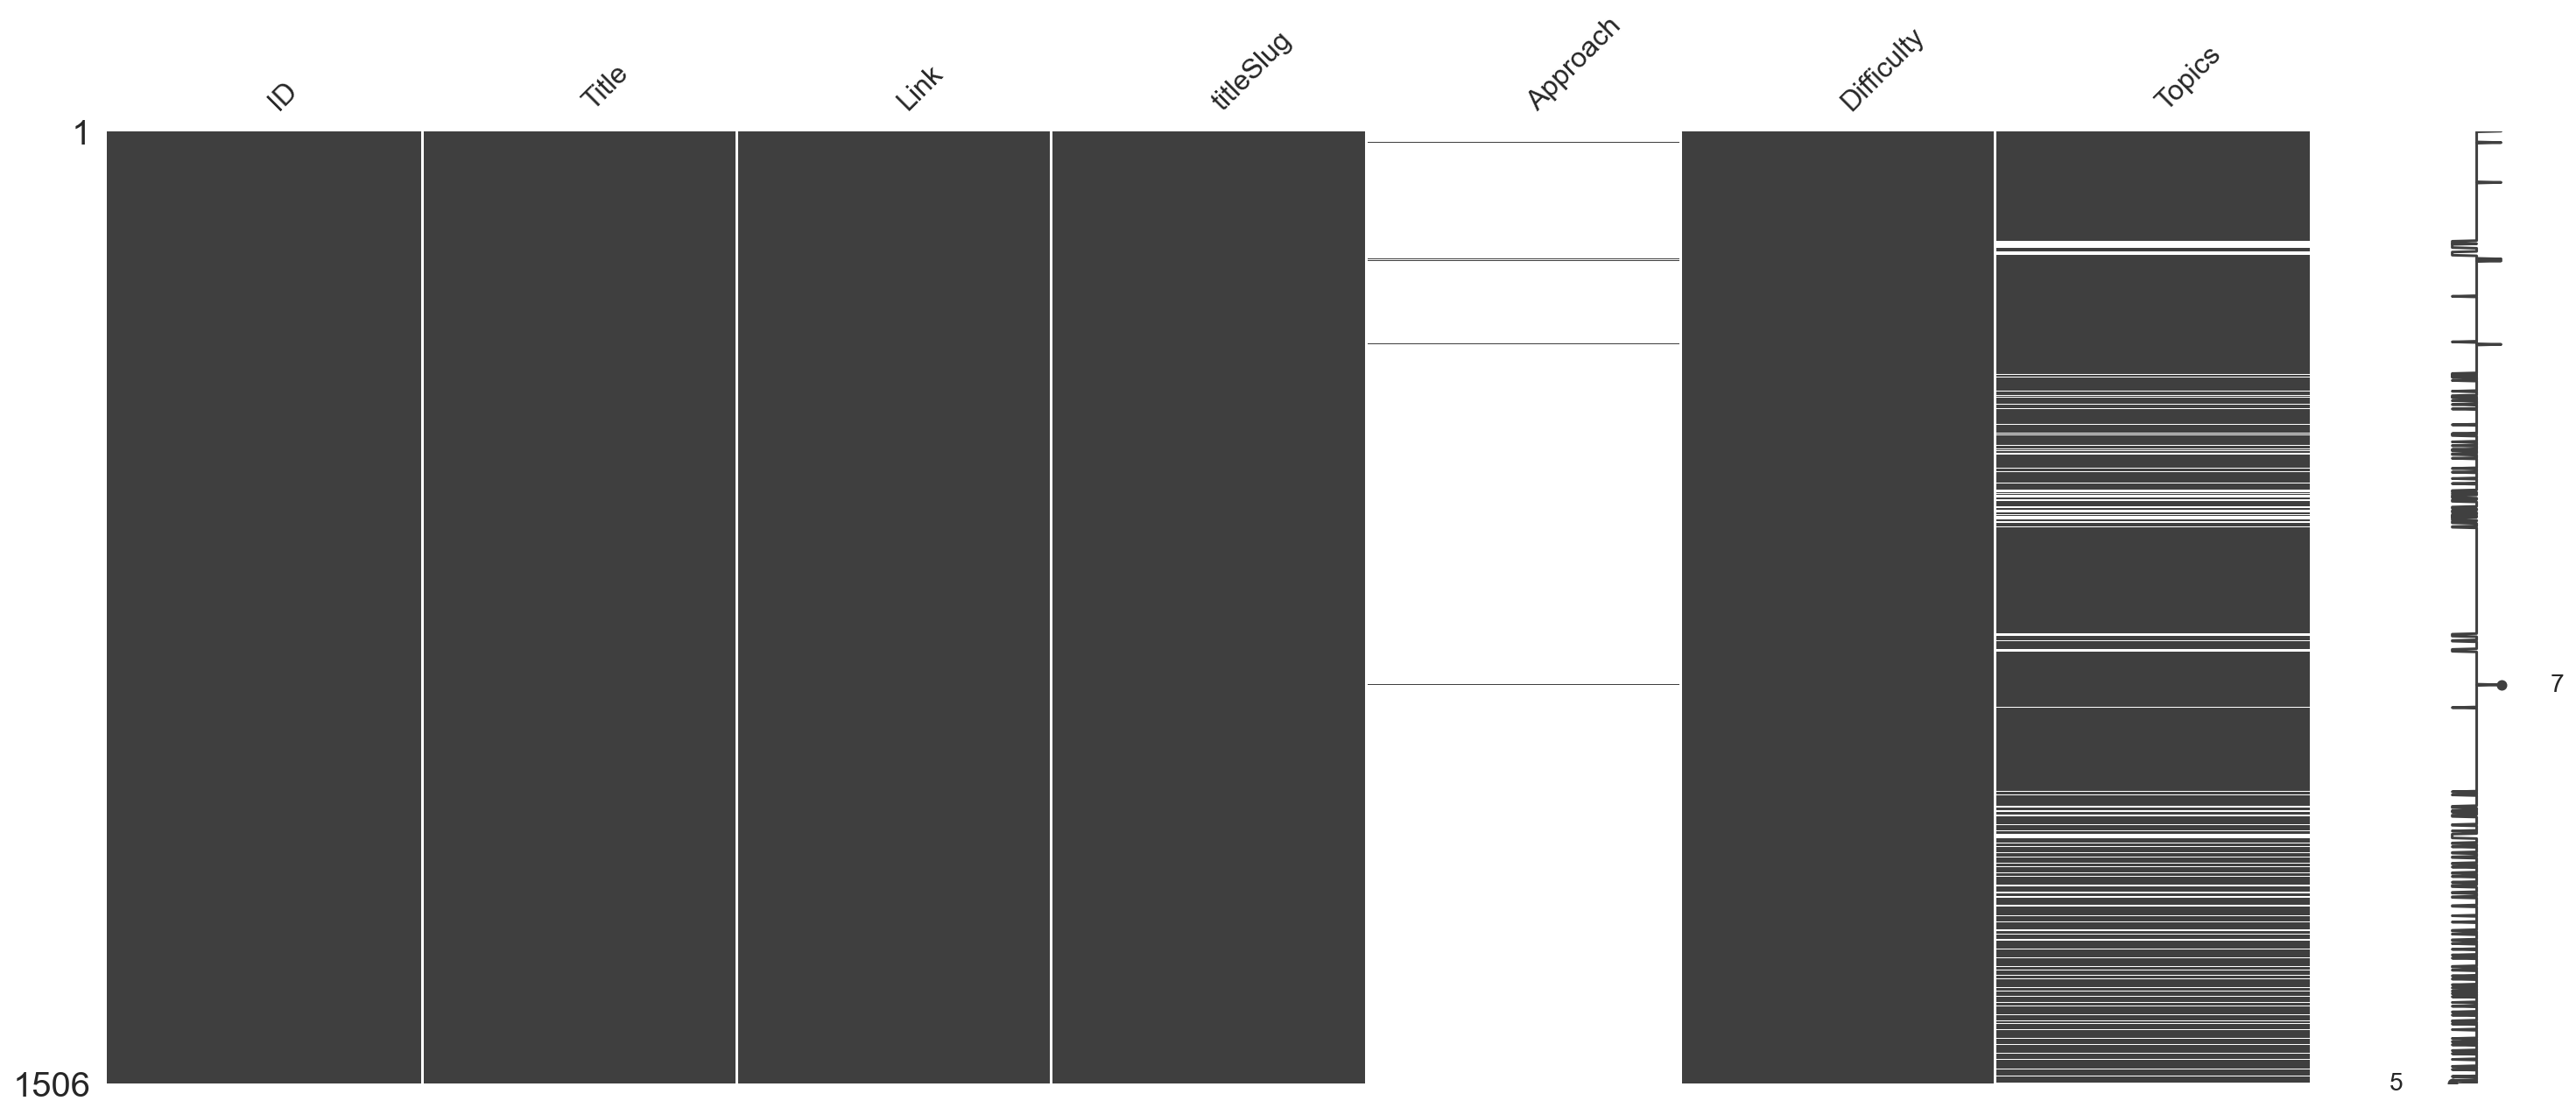

In [7]:
msno.matrix(df)

In [8]:
diff = df.Difficulty
diff.shape
diff.value_counts()

(1506,)

Medium    770
Easy      421
Hard      315
Name: Difficulty, dtype: int64

In [9]:
easy = df[df.Difficulty == 'Easy']
easy

,ID,Title,Link,titleSlug,Approach,Difficulty,Topics
0,1,Two Sum,Two Sum,two-sum,Basic 2 Pointer,Easy,"Array, Hash Table,"
2,3,Longest Substring Without Repeating Characters,Longest Substring Without Repeating Characters,longest-substring-without-repeating-characters,NaN,Easy,"Hash Table, Two Pointers, String, Sliding Wind..."
4,5,Longest Palindromic Substring,Longest Palindromic Substring,longest-palindromic-substring,NaN,Easy,"String, Dynamic Programming,"
10,11,Container With Most Water,Container With Most Water,container-with-most-water,NaN,Easy,"Array, Two Pointers,"
15,16,3Sum Closest,3Sum Closest,3sum-closest,NaN,Easy,"Array, Two Pointers,"
...,...,...,...,...,...,...,...
1492,1493,Longest Subarray of 1's After Deleting One Ele...,Longest Subarray of 1's After Deleting One Ele...,longest-subarray-of-1s-after-deleting-one-element,NaN,Easy,"Array,"
1495,1496,Path Crossing,Path Crossing,path-crossing,NaN,Easy,"String,"
1497,1498,Number of Subsequences That Satisfy the Given ...,Number of Subsequences That Satisfy the Given ...,number-of-subsequences-that-satisfy-the-given-...,NaN,Easy,"Sort, Sliding Window,"
1498,1499,Max Value of Equation,Max Value of Equation,max-value-of-equation,NaN,Easy,"Array, Sliding Window,"


In [10]:
medium = df[df.Difficulty == 'Medium']
medium

,ID,Title,Link,titleSlug,Approach,Difficulty,Topics
1,2,Add Two Numbers,Add Two Numbers,add-two-numbers,NaN,Medium,"Linked List, Math,"
5,6,ZigZag Conversion,ZigZag Conversion,zigzag-conversion,NaN,Medium,"String,"
6,7,Reverse Integer,Reverse Integer,reverse-integer,NaN,Medium,"Math,"
7,8,String to Integer (atoi),String to Integer (atoi),string-to-integer-atoi,NaN,Medium,"Math, String,"
8,9,Palindrome Number,Palindrome Number,palindrome-number,NaN,Medium,"Math,"
...,...,...,...,...,...,...,...
1494,1495,Friendly Movies Streamed Last Month,Friendly Movies Streamed Last Month,friendly-movies-streamed-last-month,NaN,Medium,NaN
1499,1500,Design a File Sharing System,Design a File Sharing System,design-a-file-sharing-system,NaN,Medium,"Array,"
1500,1501,Countries You Can Safely Invest In,Countries You Can Safely Invest In,countries-you-can-safely-invest-in,NaN,Medium,NaN
1502,1503,Last Moment Before All Ants Fall Out of a Plank,Last Moment Before All Ants Fall Out of a Plank,last-moment-before-all-ants-fall-out-of-a-plank,NaN,Medium,"Array, Brainteaser,"


In [11]:
hard = df[df.Difficulty == 'Hard']
hard

,ID,Title,Link,titleSlug,Approach,Difficulty,Topics
3,4,Median of Two Sorted Arrays,Median of Two Sorted Arrays,median-of-two-sorted-arrays,NaN,Hard,"Array, Binary Search, Divide and Conquer,"
9,10,Regular Expression Matching,Regular Expression Matching,regular-expression-matching,NaN,Hard,"String, Dynamic Programming, Backtracking,"
14,15,3Sum,3Sum,3sum,NaN,Hard,"Array, Two Pointers,"
16,17,Letter Combinations of a Phone Number,Letter Combinations of a Phone Number,letter-combinations-of-a-phone-number,NaN,Hard,"String, Backtracking,"
17,18,4Sum,4Sum,4sum,NaN,Hard,"Array, Hash Table, Two Pointers,"
...,...,...,...,...,...,...,...
1483,1484,Group Sold Products By The Date,Group Sold Products By The Date,group-sold-products-by-the-date,NaN,Hard,NaN
1493,1494,Parallel Courses II,Parallel Courses II,parallel-courses-ii,NaN,Hard,"Graph,"
1496,1497,Check If Array Pairs Are Divisible by k,Check If Array Pairs Are Divisible by k,check-if-array-pairs-are-divisible-by-k,NaN,Hard,"Array, Math, Greedy,"
1501,1502,Can Make Arithmetic Progression From Sequence,Can Make Arithmetic Progression From Sequence,can-make-arithmetic-progression-from-sequence,NaN,Hard,"Array, Sort,"


In [12]:
easy.to_csv('easy.csv',index=False)
medium.to_csv('medium.csv',index=False)
hard.to_csv('hard.csv',index=False)

In [13]:
df

,ID,Title,Link,titleSlug,Approach,Difficulty,Topics
0,1,Two Sum,Two Sum,two-sum,Basic 2 Pointer,Easy,"Array, Hash Table,"
1,2,Add Two Numbers,Add Two Numbers,add-two-numbers,NaN,Medium,"Linked List, Math,"
2,3,Longest Substring Without Repeating Characters,Longest Substring Without Repeating Characters,longest-substring-without-repeating-characters,NaN,Easy,"Hash Table, Two Pointers, String, Sliding Wind..."
3,4,Median of Two Sorted Arrays,Median of Two Sorted Arrays,median-of-two-sorted-arrays,NaN,Hard,"Array, Binary Search, Divide and Conquer,"
4,5,Longest Palindromic Substring,Longest Palindromic Substring,longest-palindromic-substring,NaN,Easy,"String, Dynamic Programming,"
...,...,...,...,...,...,...,...
1501,1502,Can Make Arithmetic Progression From Sequence,Can Make Arithmetic Progression From Sequence,can-make-arithmetic-progression-from-sequence,NaN,Hard,"Array, Sort,"
1502,1503,Last Moment Before All Ants Fall Out of a Plank,Last Moment Before All Ants Fall Out of a Plank,last-moment-before-all-ants-fall-out-of-a-plank,NaN,Medium,"Array, Brainteaser,"
1503,1504,Count Submatrices With All Ones,Count Submatrices With All Ones,count-submatrices-with-all-ones,NaN,Easy,"Dynamic Programming,"
1504,1505,Minimum Possible Integer After at Most K Adjac...,Minimum Possible Integer After at Most K Adjac...,minimum-possible-integer-after-at-most-k-adjac...,NaN,Hard,"Greedy,"


In [14]:
topics = df.Topics

topics

0                                     Array, Hash Table, 
1                                     Linked List, Math, 
2       Hash Table, Two Pointers, String, Sliding Wind...
3              Array, Binary Search, Divide and Conquer, 
4                           String, Dynamic Programming, 
                              ...                        
1501                                        Array, Sort, 
1502                                 Array, Brainteaser, 
1503                                Dynamic Programming, 
1504                                             Greedy, 
1505                                                  NaN
Name: Topics, Length: 1506, dtype: object

In [15]:
all_topics=[]
for i in topics:
    if(type(i)==str and i!='nan' and i!=' '):
        all_topics.append(i.split(','))
        
for i in range(len(all_topics)):
    for j in range(len(all_topics[i])):
        all_topics[i][j]=all_topics[i][j].strip()

all_topics

[['Array', 'Hash Table', ''],
 ['Linked List', 'Math', ''],
 ['Hash Table', 'Two Pointers', 'String', 'Sliding Window', ''],
 ['Array', 'Binary Search', 'Divide and Conquer', ''],
 ['String', 'Dynamic Programming', ''],
 ['String', ''],
 ['Math', ''],
 ['Math', 'String', ''],
 ['Math', ''],
 ['String', 'Dynamic Programming', 'Backtracking', ''],
 ['Array', 'Two Pointers', ''],
 ['Math', 'String', ''],
 ['Math', 'String', ''],
 ['String', ''],
 ['Array', 'Two Pointers', ''],
 ['Array', 'Two Pointers', ''],
 ['String', 'Backtracking', ''],
 ['Array', 'Hash Table', 'Two Pointers', ''],
 ['Linked List', 'Two Pointers', ''],
 ['String', 'Stack', ''],
 ['Linked List', ''],
 ['String', 'Backtracking', ''],
 ['Linked List', 'Divide and Conquer', 'Heap', ''],
 ['Linked List', ''],
 ['Linked List', ''],
 ['Array', 'Two Pointers', ''],
 ['Array', 'Two Pointers', ''],
 ['Two Pointers', 'String', ''],
 ['Math', 'Binary Search', ''],
 ['Hash Table', 'Two Pointers', 'String', ''],
 ['Array', ''],
 ['

In [16]:
# flatten list
flat_list = []
for sublist in all_topics:
    for item in sublist:
        flat_list.append(item)
        


# remove ''
flat_list = [x for x in flat_list if x != '' and x!='nan']

flat_list

['Array',
 'Hash Table',
 'Linked List',
 'Math',
 'Hash Table',
 'Two Pointers',
 'String',
 'Sliding Window',
 'Array',
 'Binary Search',
 'Divide and Conquer',
 'String',
 'Dynamic Programming',
 'String',
 'Math',
 'Math',
 'String',
 'Math',
 'String',
 'Dynamic Programming',
 'Backtracking',
 'Array',
 'Two Pointers',
 'Math',
 'String',
 'Math',
 'String',
 'String',
 'Array',
 'Two Pointers',
 'Array',
 'Two Pointers',
 'String',
 'Backtracking',
 'Array',
 'Hash Table',
 'Two Pointers',
 'Linked List',
 'Two Pointers',
 'String',
 'Stack',
 'Linked List',
 'String',
 'Backtracking',
 'Linked List',
 'Divide and Conquer',
 'Heap',
 'Linked List',
 'Linked List',
 'Array',
 'Two Pointers',
 'Array',
 'Two Pointers',
 'Two Pointers',
 'String',
 'Math',
 'Binary Search',
 'Hash Table',
 'Two Pointers',
 'String',
 'Array',
 'String',
 'Stack',
 'Array',
 'Binary Search',
 'Array',
 'Binary Search',
 'Array',
 'Binary Search',
 'Hash Table',
 'Hash Table',
 'Backtracking',
 'Strin

In [17]:
setTopics = set()
for i in range(len(all_topics)):
    for j in range(len(all_topics[i])):
        setTopics.add(all_topics[i][j].strip())

In [18]:
setTopics


{'',
 'Array',
 'Backtracking',
 'Binary Indexed Tree',
 'Binary Search',
 'Binary Search Tree',
 'Bit Manipulation',
 'Brainteaser',
 'Breadth-first Search',
 'Depth-first Search',
 'Design',
 'Divide and Conquer',
 'Dynamic Programming',
 'Geometry',
 'Graph',
 'Greedy',
 'Hash Table',
 'Heap',
 'Line Sweep',
 'Linked List',
 'Math',
 'Memoization',
 'Minimax',
 'Ordered Map',
 'Queue',
 'Random',
 'Recursion',
 'Rejection Sampling',
 'Reservoir Sampling',
 'Rolling Hash',
 'Segment Tree',
 'Sliding Window',
 'Sort',
 'Stack',
 'String',
 'Suffix Array',
 'Topological Sort',
 'Tree',
 'Trie',
 'Two Pointers',
 'Union Find'}

In [19]:
len(setTopics)

41

In [20]:
from collections import Counter
# Counter of all topics
counter = Counter(flat_list)
counter = dict(counter)
# counter sort by value
sorted_counter = sorted(counter.items(), key=lambda x: x[1], reverse=True)
sorted_counter


[('Array', 268),
 ('Dynamic Programming', 208),
 ('String', 181),
 ('Math', 179),
 ('Tree', 139),
 ('Depth-first Search', 130),
 ('Hash Table', 128),
 ('Binary Search', 85),
 ('Greedy', 82),
 ('Breadth-first Search', 70),
 ('Two Pointers', 60),
 ('Stack', 57),
 ('Sort', 56),
 ('Backtracking', 55),
 ('Bit Manipulation', 50),
 ('Design', 50),
 ('Graph', 43),
 ('Linked List', 39),
 ('Heap', 35),
 ('Union Find', 30),
 ('Sliding Window', 25),
 ('Divide and Conquer', 19),
 ('Trie', 17),
 ('Recursion', 15),
 ('Segment Tree', 12),
 ('Ordered Map', 10),
 ('Queue', 9),
 ('Minimax', 8),
 ('Geometry', 7),
 ('Topological Sort', 6),
 ('Binary Indexed Tree', 6),
 ('Line Sweep', 6),
 ('Brainteaser', 6),
 ('Random', 6),
 ('Binary Search Tree', 4),
 ('Reservoir Sampling', 2),
 ('Rejection Sampling', 2),
 ('Rolling Hash', 2),
 ('Memoization', 1),
 ('Suffix Array', 1)]

In [21]:
count_df = pd.DataFrame(sorted_counter, columns=['Topic', 'Count'])
count_df

,Topic,Count
0,Array,268
1,Dynamic Programming,208
2,String,181
3,Math,179
4,Tree,139
5,Depth-first Search,130
6,Hash Table,128
7,Binary Search,85
8,Greedy,82
9,Breadth-first Search,70


In [29]:

def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.2f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

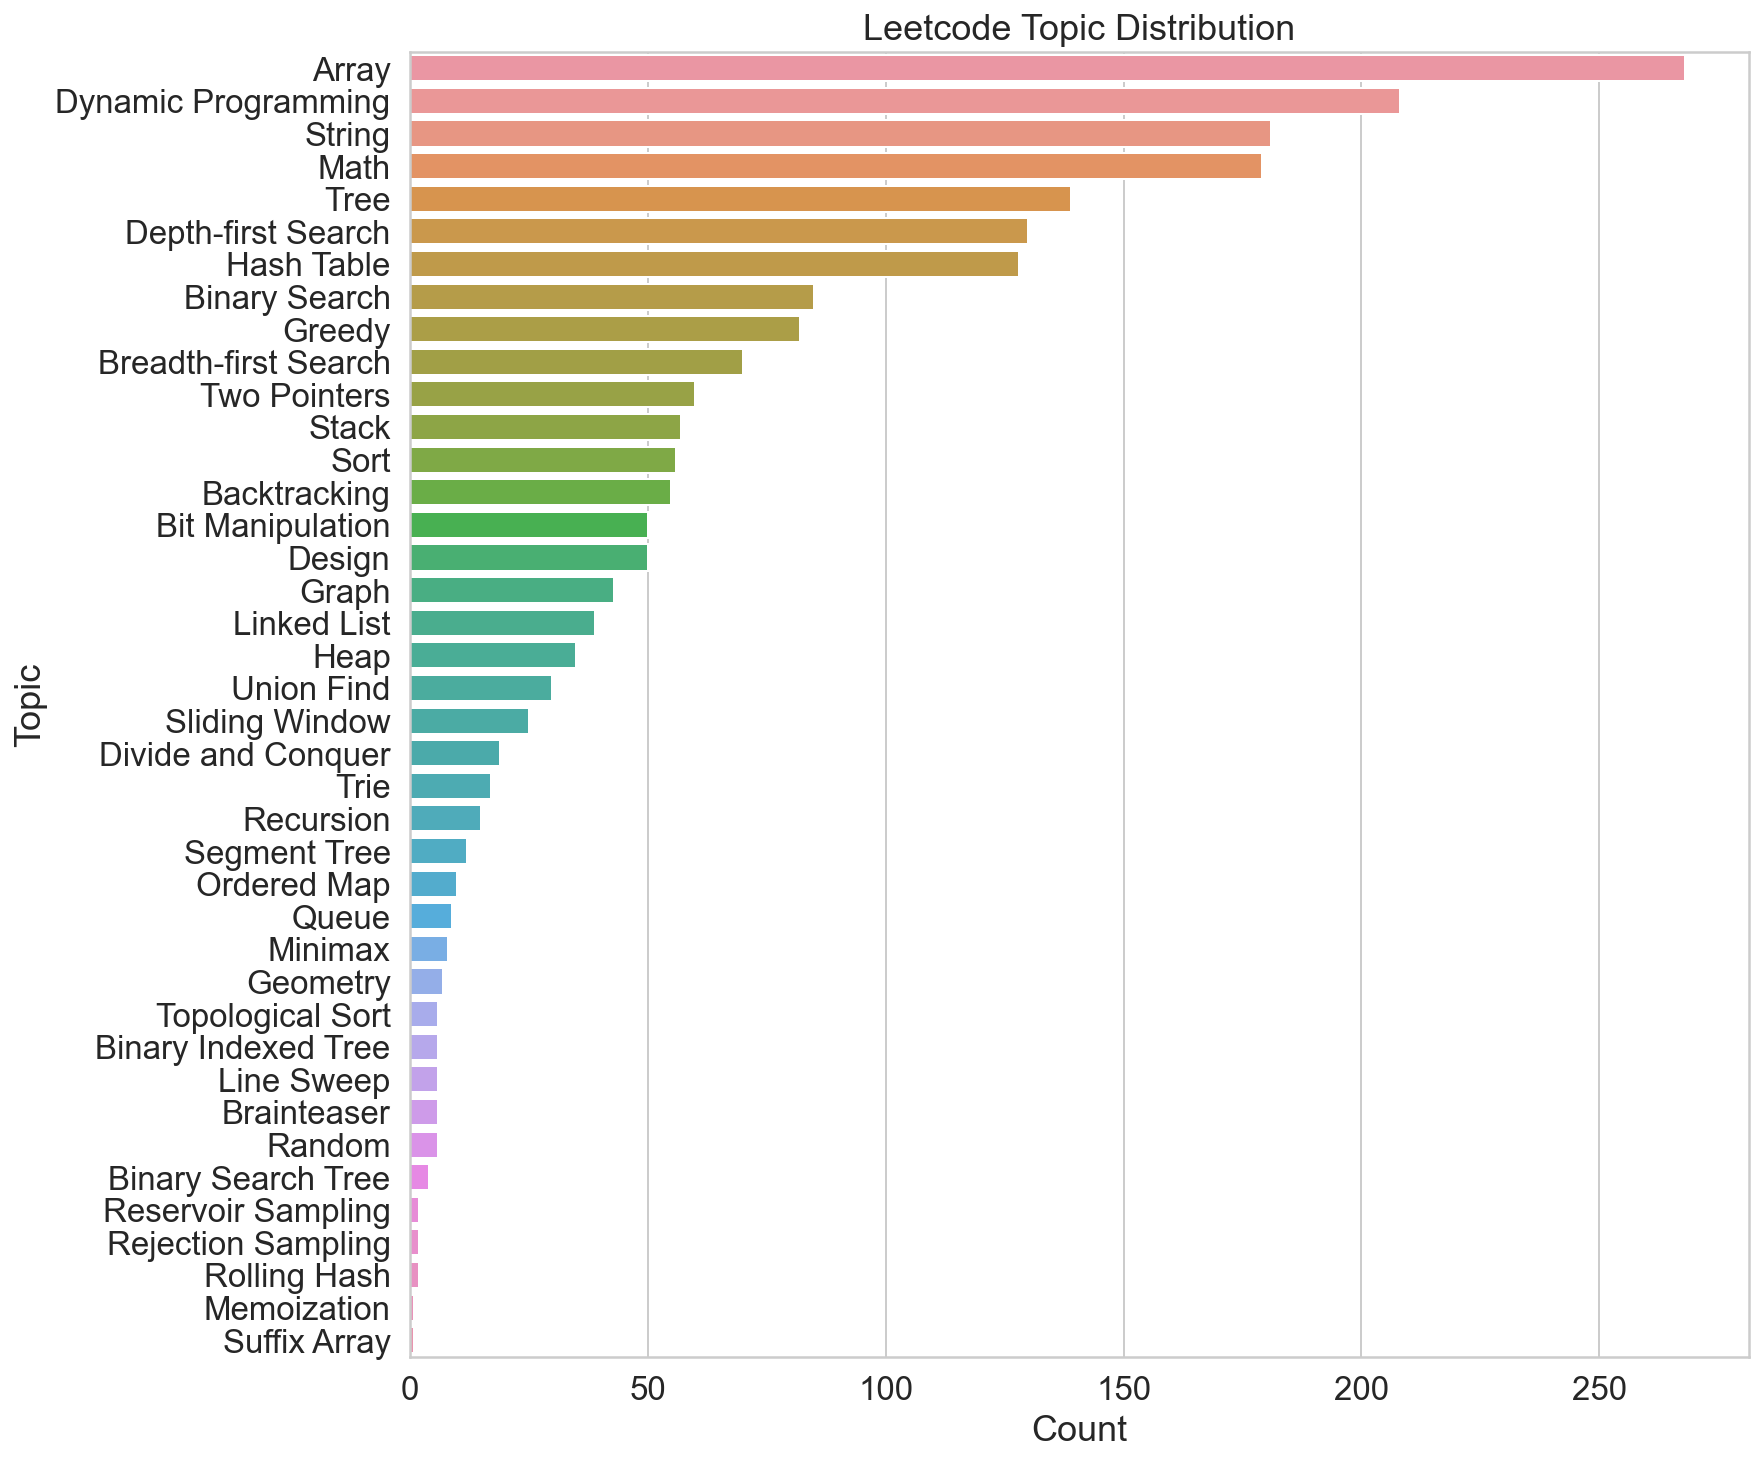

In [33]:
# most asked 10 topics barchart

plt.figure(figsize=(12,12))
plt.title('Leetcode Topic Distribution')
plt.xlabel('Topic')
plt.ylabel('Count')

plots =  sns.barplot(y='Topic', x='Count', data=count_df);

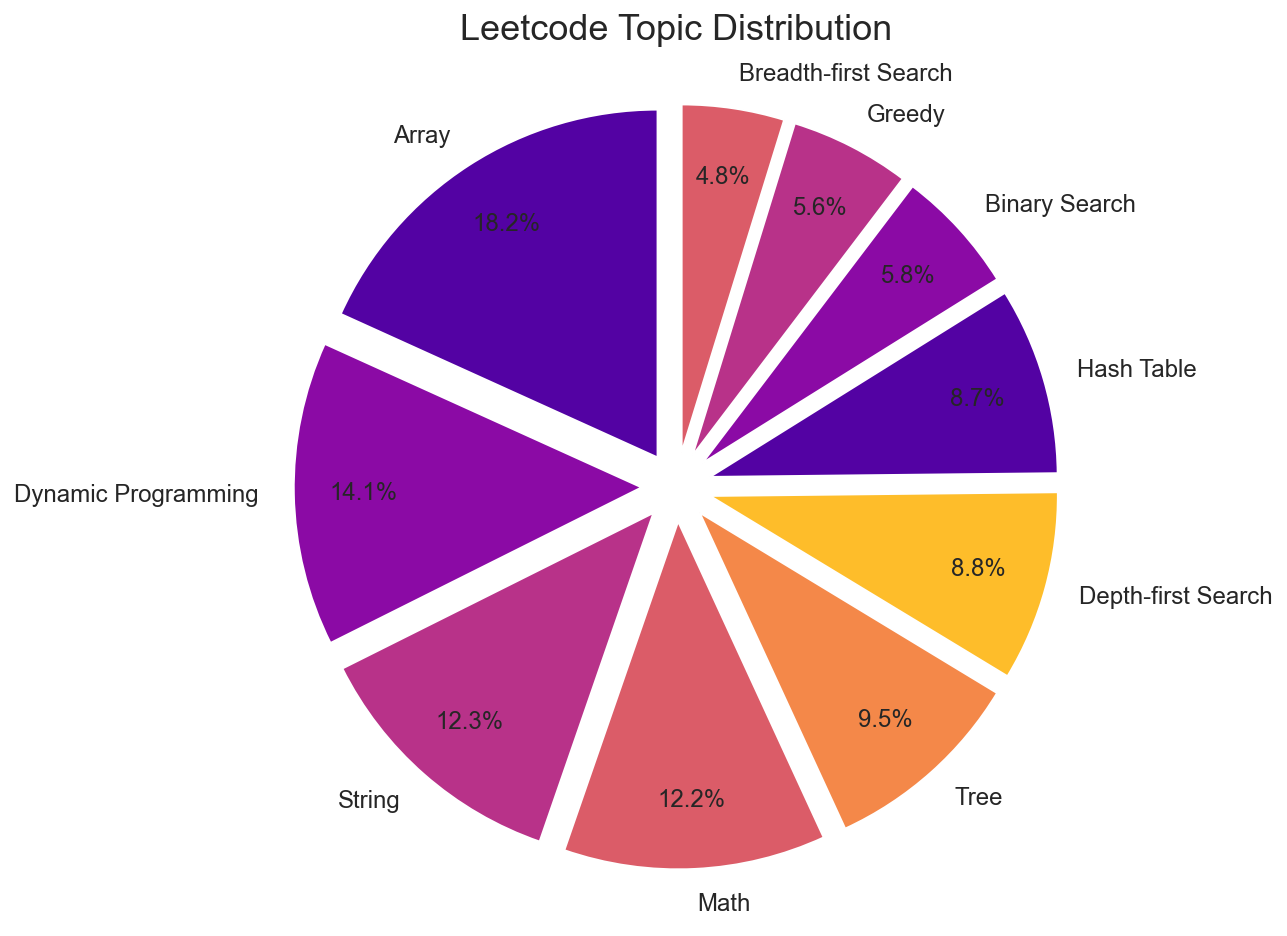

In [23]:
# pie chart
plt.title('Leetcode Topic Distribution')
plt.pie(count_df['Count'].head(10), labels=count_df['Topic'].head(10), autopct='%1.1f%%', shadow=False, startangle=90, explode=[0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1], textprops={'fontsize': 12}, pctdistance=0.8);